SOURCE : GOOGLE DEVELOPERs COURCES

This code cell imports the `ImageDataGenerator` class from `tensorflow.keras.preprocessing.image`. It then creates an instance of this class named `datagen` and configures it with various parameters for image augmentation. These parameters include:

*   `rotation_range`: Randomly rotates images by up to 40 degrees.
*   `width_shift_range`: Randomly shifts the width of images by up to 20% of the total width.
*   `height_shift_range`: Randomly shifts the height of images by up to 20% of the total height.
*   `shear_range`: Applies random shearing transformations by up to 20%.
*   `zoom_range`: Randomly zooms in on images by up to 20%.
*   `horizontal_flip`: Randomly flips images horizontally.
*   `fill_mode`: Fills in newly created pixels after a transformation using the nearest available pixel.

This `datagen` object will be used later to generate batches of augmented images during model training, which helps to increase the diversity of the training data and improve the model's ability to generalize.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

This cell uses the `wget` command to download a zip file containing images of cats and dogs from a Google Cloud Storage URL. The `-O` flag specifies the output path and filename where the downloaded file will be saved, which is `/tmp/cats_and_dogs_filtered.zip`. The `--no-check-certificate` flag is used to prevent certificate validation errors during the download.

This code snippet first imports the `os` and `zipfile` libraries to interact with the operating system and handle zip files, respectively.

*   **Extracting the dataset**: It defines the path to the downloaded zip file (`local_zip`), opens it in read mode (`'r'`), extracts all its contents to the `/tmp` directory, and then closes the zip file.
*   **Setting up directory paths**: It defines the base directory where the extracted files are located (`base_dir`) and then creates paths for the training and validation directories (`train_dir` and `validation_dir`) by joining the `base_dir` with 'train' and 'validation'.
*   **Defining class directories**: It further defines paths for the cat and dog image directories within both the training and validation sets.
*   **Listing file names**: Finally, it lists the filenames of the cat and dog images in the training directory and stores them in `train_cat_fnames` and `train_dog_fnames` respectively.

In essence, this code unpacks the downloaded dataset and sets up the necessary directory structure and file lists to access the training and validation images for the cat and dog classification task.

In [ ]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

--2025-11-11 09:29:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.135.207, 142.251.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   318MB/s    in 0.2s    

2025-11-11 09:29:45 (318 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



This code snippet first imports the `os` and `zipfile` libraries to interact with the operating system and handle zip files, respectively.

*   **Extracting the dataset**: It defines the path to the downloaded zip file (`local_zip`), opens it in read mode (`'r'`), extracts all its contents to the `/tmp` directory, and then closes the zip file.
*   **Setting up directory paths**: It defines the base directory where the extracted files are located (`base_dir`) and then creates paths for the training and validation directories (`train_dir` and `validation_dir`) by joining the `base_dir` with 'train' and 'validation'.
*   **Defining class directories**: It further defines paths for the cat and dog image directories within both the training and validation sets.
*   **Listing file names**: Finally, it lists the filenames of the cat and dog images in the training directory and stores them in `train_cat_fnames` and `train_dog_fnames` respectively.

In essence, this code unpacks the downloaded dataset and sets up the necessary directory structure and file lists to access the training and validation images for the cat and dog classification task.

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

This code visualizes augmented images using the ImageDataGenerator created earlier.

*   **Import necessary libraries**: It imports `matplotlib.pyplot` and `matplotlib.image` for plotting, and specific image processing functions from `tensorflow.keras.preprocessing.image`.
*   **Load and preprocess an image**: It selects the third cat image from the training set, loads it, resizes it to 150x150 pixels, converts it to a NumPy array, and adds a batch dimension to the array.
*   **Generate and display augmented images**: It then uses the `datagen.flow()` method to generate batches of randomly transformed versions of the image. The code iterates through these batches and displays the first image of every fifth batch using `matplotlib`. The loop is broken after displaying 5 augmented images.

This cell demonstrates how the `ImageDataGenerator` can be used to create variations of existing images, which is a key technique for data augmentation in image classification tasks.

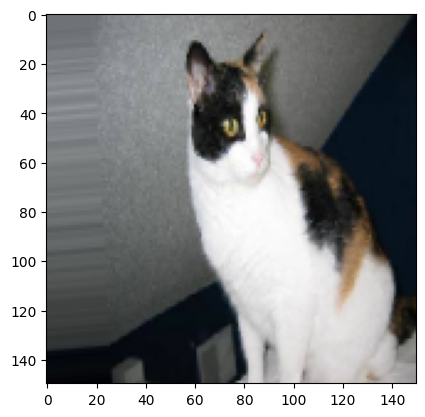

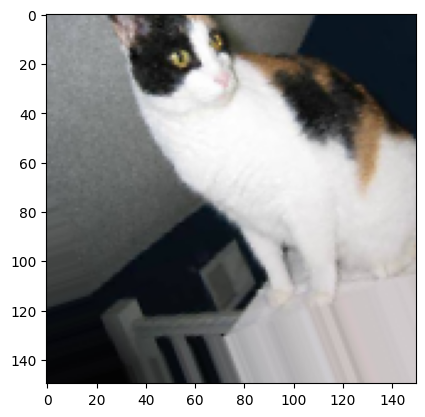

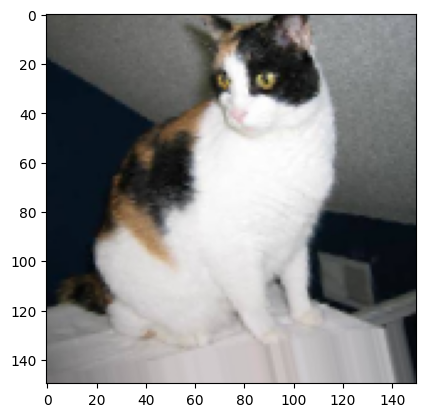

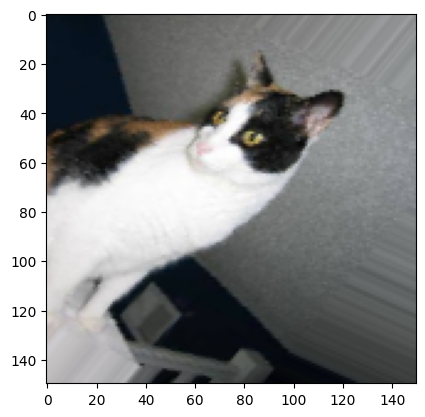

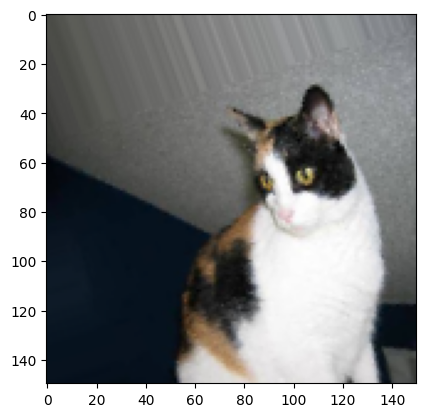

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

This cell sets up two ImageDataGenerator instances, one for training data (train_datagen) and one for validation data (val_datagen).

*   **train_datagen**: This generator is configured with several data augmentation techniques, including rescaling pixel values to be between 0 and 1 (`rescale=1./255`), rotation, shifting, shearing, zooming, and horizontal flipping. These augmentations are applied randomly to the training images during training to increase the size and diversity of the training dataset and help prevent overfitting.

*   **val_datagen**: This generator is only configured with `rescale=1./255`. Data augmentation is typically not applied to validation data, as the goal is to evaluate the model's performance on unseen, unaugmented data.

*   **train_generator and validation_generator**: The `flow_from_directory()` method is used with both generators to create data generators that read images directly from the specified directories (`train_dir` and `validation_dir`).
    *   `target_size=(150, 150)` resizes all images to 150x150 pixels.
    *   `batch_size=20` specifies that the generators will yield batches of 20 images.
    *   `class_mode='binary'` indicates that the labels are binary (0 or 1), which is suitable for binary classification problems like this one (cats vs. dogs).

These generators will be used to feed image data to the neural network during the training process.

In [ ]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


This code defines and compiles a Convolutional Neural Network (CNN) model for binary image classification (cats vs. dogs).

*   **Import necessary libraries**: It imports `layers` and `Model` from `tensorflow.keras` to build the model, and `RMSprop` from `tensorflow.keras.optimizers` for the optimizer.

*   **Define input layer**: `img_input = layers.Input(shape=(150, 150, 3))` defines the input layer with the expected image shape (150x150 pixels with 3 color channels).

*   **Add convolutional and pooling layers**: The code then adds three blocks of convolutional (`layers.Conv2D`) and max-pooling (`layers.MaxPooling2D`) layers. These layers extract features from the input images.

*   **Flatten layer**: `x = layers.Flatten()(x)` flattens the output of the convolutional layers into a 1-dimensional tensor to be fed into the dense layers.

*   **Dense layers**:
    *   `x = layers.Dense(512, activation='relu')(x)` adds a fully connected layer with 512 hidden units and ReLU activation.
    *   `x = layers.Dropout(0.5)(x)` adds a dropout layer with a rate of 0.5 to help prevent overfitting.

*   **Output layer**: `output = layers.Dense(1, activation='sigmoid')(x)` adds the output layer with a single node and sigmoid activation, which is suitable for binary classification.

*   **Create and compile model**: `model = Model(img_input, output)` creates the model using the defined input and output layers. `model.compile(...)` configures the model for training with:
    *   `loss='binary_crossentropy'`: The loss function used for binary classification.
    *   `optimizer=RMSprop(learning_rate=0.001)`: The RMSprop optimizer with a learning rate of 0.001.
    *   `metrics=['acc']`: The metric used to evaluate the model during training (accuracy).

This compiled model is now ready to be trained on the image data.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

This code trains the defined CNN model using the image data generators.

*   `model.fit(...)`: This function initiates the training process.
*   `train_generator`: Provides batches of augmented training images and their corresponding labels.
*   `steps_per_epoch=100`: Specifies the number of batches to yield from the training generator for each epoch.
*   `epochs=30`: Sets the number of times the training process will iterate over the entire training dataset.
*   `validation_data=validation_generator`: Provides batches of validation images and their labels to evaluate the model's performance on unseen data at the end of each epoch.
*   `validation_steps=50`: Specifies the number of batches to yield from the validation generator for evaluation.
*   `verbose=2`: Controls the amount of information displayed during training (2 means it will show one line per epoch).

The training process will continue for 30 epochs, and the model's accuracy and loss will be reported for both the training and validation sets after each epoch. This information is stored in the `history` object, which can be used later to visualize the training progress.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 - 21s - 208ms/step - acc: 0.5000 - loss: 0.8488 - val_acc: 0.5090 - val_loss: 0.6875
Epoch 2/30
100/100 - 14s - 137ms/step - acc: 0.5565 - loss: 0.6942 - val_acc: 0.5190 - val_loss: 0.6776
Epoch 3/30
100/100 - 14s - 137ms/step - acc: 0.5770 - loss: 0.6837 - val_acc: 0.6760 - val_loss: 0.6296
Epoch 4/30
100/100 - 14s - 141ms/step - acc: 0.6085 - loss: 0.6679 - val_acc: 0.6390 - val_loss: 0.6266
Epoch 5/30
100/100 - 14s - 138ms/step - acc: 0.6315 - loss: 0.6415 - val_acc: 0.6250 - val_loss: 0.6234
Epoch 6/30
100/100 - 14s - 137ms/step - acc: 0.6515 - loss: 0.6289 - val_acc: 0.6930 - val_loss: 0.5793
Epoch 7/30
100/100 - 14s - 137ms/step - acc: 0.6585 - loss: 0.6280 - val_acc: 0.6990 - val_loss: 0.5659
Epoch 8/30
100/100 - 14s - 135ms/step - acc: 0.6740 - loss: 0.6003 - val_acc: 0.6910 - val_loss: 0.5781
Epoch 9/30
100/100 - 14s - 137ms/step - acc: 0.6860 - loss: 0.5881 - val_acc: 0.6910 - val_loss: 0.5789
Epoch 10/30
100/100 - 14s - 138ms/step - acc: 0.6930 - loss: 0.6

This code visualizes the training and validation accuracy and loss over the epochs.

*   **Retrieve metrics**: It retrieves the training and validation accuracy and loss values from the `history` object obtained during model training.
*   **Get number of epochs**: It creates a range of numbers representing the epochs.
*   **Plot accuracy**: It plots the training and validation accuracy against the number of epochs.
*   **Plot loss**: It creates a new figure and plots the training and validation loss against the number of epochs.

These plots help to visualize the model's performance during training and identify potential issues like overfitting.

Text(0.5, 1.0, 'Training and validation loss')

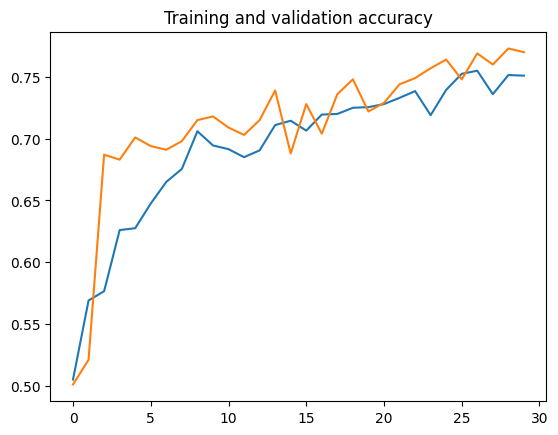

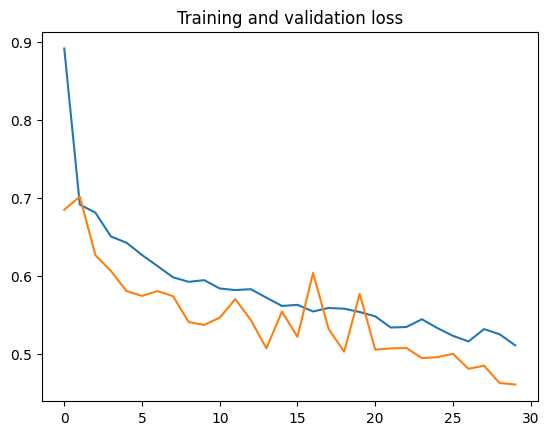

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# Task
Add code to save the trained model, load it, and then use it to predict the class of a new image.

## Save the trained model

### Subtask:
Save the trained model to a file.


**Reasoning**:
Import the necessary library to save the model and save the trained model to a file.



In [ ]:
from tensorflow.keras.models import save_model

save_model(model, 'cats_and_dogs_model.h5')

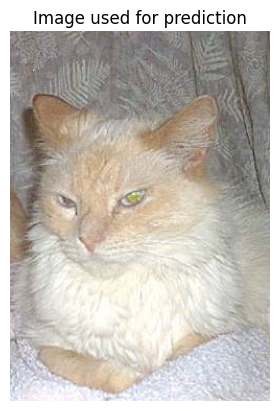

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the image
img_display = mpimg.imread(new_image_path)
plt.imshow(img_display)
plt.title("Image used for prediction")
plt.axis('off') # Hide axes
plt.show()

## Load the saved model

### Subtask:
Load the model from the saved file.


**Reasoning**:
Import the necessary function to load a Keras model and then load the saved model from the file.



In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('cats_and_dogs_model.h5')

## Prepare a new image for prediction

### Subtask:
Load and preprocess an image that the model hasn't seen before.


**Reasoning**:
Load and preprocess a new image for prediction.



**Reasoning**:
The previous attempt to load the image failed because the specified file path does not exist. I need to find an existing image file within the validation cats directory and use that path instead.



In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to the validation cats directory
validation_cats_dir = '/tmp/cats_and_dogs_filtered/validation/cats'

# Get a list of files in the validation cats directory
validation_cat_fnames = os.listdir(validation_cats_dir)

# Select the first image file from the list
new_image_filename = validation_cat_fnames[0]
new_image_path = os.path.join(validation_cats_dir, new_image_filename)

# Load the image, resizing it to the target size
img = load_img(new_image_path, target_size=(150, 150))

# Convert the loaded image to a NumPy array
img_array = img_to_array(img)

# Reshape the array to have an additional dimension for batch size
img_array = np.expand_dims(img_array, axis=0)

# Rescale the pixel values
img_array = img_array / 255.0

## Predict with the loaded model

### Subtask:
Use the loaded model to predict the class of the new image.


**Reasoning**:
Use the loaded model to predict the class of the new image.



In [ ]:
prediction = loaded_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


**Reasoning**:
The prediction has been made, now I need to interpret the prediction result to determine the class of the image.



In [ ]:
if prediction[0] > 0.5:
    print("The image is a dog.")
else:
    print("The image is a cat.")


The image is a cat.


## Display the prediction

### Subtask:
Show the prediction result.


**Reasoning**:
Display the prediction result and the determined class.



In [ ]:
print(f"Raw prediction value: {prediction[0]}")
if prediction[0] > 0.5:
    print("The image is predicted to be a dog.")
else:
    print("The image is predicted to be a cat.")

Raw prediction value: [0.07451415]
The image is predicted to be a cat.


## Summary:

### Data Analysis Key Findings

*   The trained model was successfully saved to the legacy HDF5 format (`cats_and_dogs_model.h5`), although the native Keras format (`.keras`) is recommended for future use.
*   The model was successfully loaded from the saved file, and the compiled metrics were not yet built upon loading.
*   A new image from the validation set (specifically the first cat image found) was successfully loaded, resized to 150x150 pixels, converted to a NumPy array, expanded with a batch dimension, and rescaled to pixel values between 0 and 1 for prediction.
*   The loaded model predicted the class of the new image, resulting in a raw prediction value of approximately 0.0745.
*   Based on a threshold of 0.5, the model correctly classified the new image as a cat, as the prediction value (0.0745) was less than 0.5.

### Insights or Next Steps

*   Consider saving the model in the recommended native Keras format (`.keras`) in the future for improved compatibility and features.
*   The model's prediction aligns with the actual class of the image (a cat), indicating the model is performing as expected on this specific example.
